### Protein analysis FL+FBM+CB
#### Mariana Quiroga Londono 
#### 110221

In [1]:
#SETTING ENVIRONMENT 

import rpy2
#import tzlocal
#%load_ext rpy2.ipython

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save=1000)

/usr/local/lib/python3.7/dist-packages/numba/core/cpu.py:77: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()


In [2]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

In [3]:
DSB_output0 =sc.read("110221_mq224_postQC_postDSB_postFDG_postHarmony_ADTonmRNA_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")


In [4]:
DSB_output0

AnnData object with n_obs × n_vars = 27998 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment', 'leiden', 'louvain', 'Cell.labels.P4.sorted'
    var: 'bg_mean'
    uns: 'Sample_colors', 'Tissue_colors', 'assignment_colors', 'draw_graph', 'leiden', 'leiden_colors', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_orig_pca', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
len(np.unique(DSB_output0.obs['Cell.labels.P4.sorted']))

22

In [6]:
new_order = ["HSC/MPP I","HSC/MPP II","HSC/MPP III","HSC/MPP IV","MEP","MEP/MkP","EryP I",
 "EryP II","EryP III", "EryP IV", "Late EryP I (Pro-erythroblast)","Late EryP II (Erythroblast)","EoBasoMC", "MyP", "Early LyP","LyP I (CLP)", "LyP II (pro-B)",
 "LyP III (pro-B)", "LyP IV (pre-B)","DC progenitor I","DC progenitor II", "Undetermined"]

DSB_output0.obs['Cell.labels.P4.sorted'] = DSB_output0.obs['Cell.labels.P4.sorted'].cat.reorder_categories(new_order)

In [7]:
FBM= DSB_output0[DSB_output0.obs["Tissue"].isin(["FBM"]),:].copy()
FBM

AnnData object with n_obs × n_vars = 6150 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment', 'leiden', 'louvain', 'Cell.labels.P4.sorted'
    var: 'bg_mean'
    uns: 'Sample_colors', 'Tissue_colors', 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_orig_pca', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
HSC= FBM[FBM.obs['Cell.labels.P4.sorted'].isin(["HSC/MPP I","HSC/MPP II","HSC/MPP III","HSC/MPP IV","HSC/MPP V"]),:]

In [9]:
HSC

View of AnnData object with n_obs × n_vars = 589 × 198
    obs: 'Sample', 'batch', 'Tissue', 'assignment', 'leiden', 'louvain', 'Cell.labels.P4.sorted'
    var: 'bg_mean'
    uns: 'Sample_colors', 'Tissue_colors', 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_orig_pca', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [10]:
markers =["CD117","CD305","CD43","CD46","CD62L","Notch1"]

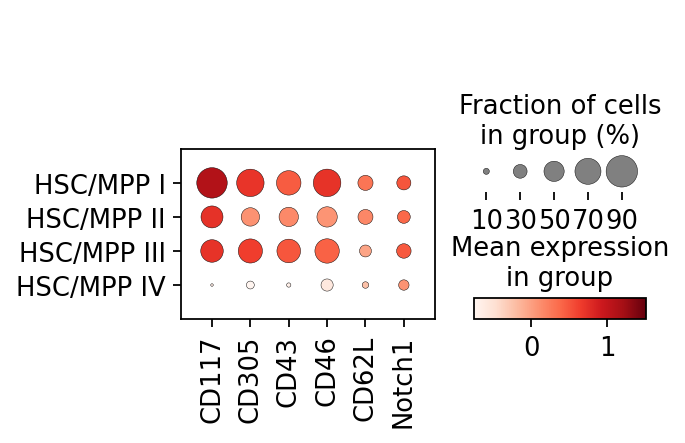

In [11]:
sc.pl.dotplot(HSC, markers, groupby='Cell.labels.P4.sorted', vmax=1.5, save="Fig_ADT_CD34+_FBM_HSCsdotplot.pdf")

In [12]:
pwd

'/rds/project/rds-SDzz0CATGms/users/mq224/project_citeseq/part2citeseq/PhD/Year_1/Collaborations/Haniffa_Lab/Comparison_HSPCs_CD34+_fromFBM_CB_and_FL/ADT'

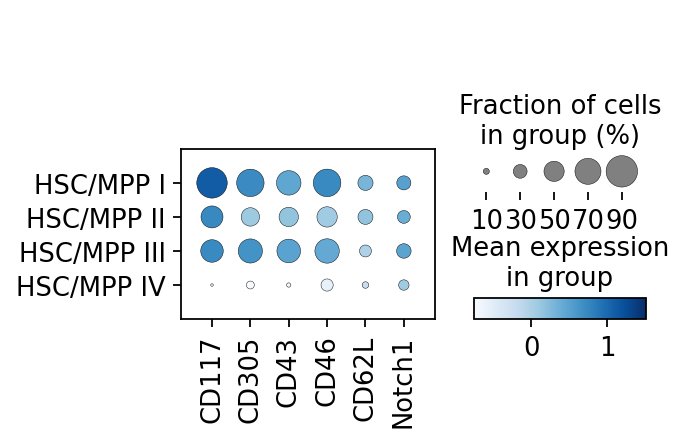

In [13]:
sc.pl.dotplot(HSC, markers, groupby='Cell.labels.P4.sorted', vmax=1.5, cmap="Blues",save="290421_Fig_ADT_CD34+_HSCMPP_FBM_dotplot.pdf")